In [2]:
import numpy as np

import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#!cd 'drive/My Drive/RL_Code'
%cd drive/My Drive/audio_files
import numpy as np
a = np.load('rounded_inputs.npy',allow_pickle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1aAYuSxypZP_SPhLV_46sl8oDgMFziC1s/audio_files


In [19]:
# load data
a_files = ['CantinaBand3.wav', 'StarWars3.wav', 'gettysburg.wav', 'taunt.wav', 'example1.mp3', 'preamble.wav']
# a_files = ['136.wav', '137.wav']
audio, samplerate = librosa.load(a_files[2])
longer_audios = []
# for i in range(500):
#   l = len(a[i])
#   if l > 300000:
#     print(i, len(a[i]))
#     longer_audios.append(i)

In [20]:
# audio = a[longer_audios[4]]

# Flatten into one large array and add noise
flattened = audio[:int(len(audio)-(len(audio)%1000))]
noise = np.random.normal(0, 0.01, (int(flattened.shape[0]),))
noisy_data = noise + flattened

display(ipd.Audio(noisy_data, rate=samplerate))

# Reshape inputs and outputs for training
X_shaped = np.reshape(noisy_data, (int(flattened.shape[0]/1000), 1, 1000))
Y_shaped = np.reshape(flattened, (int(flattened.shape[0]/1000), 1, 1000))

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_shaped, Y_shaped, test_size=0.10, random_state=42)

# plt.plot(flattened)
# plt.show()
# plt.plot(noisy_data)
model = Sequential()
model.add(LSTM((1000), input_shape=(1, 1000), return_sequences=True, activation='tanh'))
model.add(LSTM((1000), return_sequences=True, activation='tanh'))
#model.add(LSTM((1000), return_sequences=True, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 1000)           8004000   
                                                                 
 lstm_7 (LSTM)               (None, 1, 1000)           8004000   
                                                                 
Total params: 16,008,000
Trainable params: 16,008,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
11/11 - 4s - loss: 0.0013 - accuracy: 0.0029 - 4s/epoch - 393ms/step
Epoch 2/1000
11/11 - 0s - loss: 0.0013 - accuracy: 0.0057 - 245ms/epoch - 22ms/step
Epoch 3/1000
11/11 - 0s - loss: 0.0013 - accuracy: 0.0086 - 227ms/epoch - 21ms/step
Epoch 4/1000
11/11 - 0s - loss: 0.0013 - accuracy: 0.0115 - 211ms/epoch - 19ms/step
Epoch 5/1000
11/11 - 0s - loss: 0.0013 - accuracy: 0.0115 - 210ms/epoch - 19ms/step
Epoch 6/1000
11/11 -

In [9]:
history1 = model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=2)

Epoch 1/300
11/11 - 0s - loss: 1.0125e-05 - accuracy: 0.4195 - 273ms/epoch - 25ms/step
Epoch 2/300
11/11 - 0s - loss: 1.0046e-05 - accuracy: 0.4368 - 245ms/epoch - 22ms/step
Epoch 3/300
11/11 - 0s - loss: 1.0005e-05 - accuracy: 0.4339 - 224ms/epoch - 20ms/step
Epoch 4/300
11/11 - 0s - loss: 9.9417e-06 - accuracy: 0.4310 - 210ms/epoch - 19ms/step
Epoch 5/300
11/11 - 0s - loss: 9.8820e-06 - accuracy: 0.4368 - 210ms/epoch - 19ms/step
Epoch 6/300
11/11 - 0s - loss: 9.8210e-06 - accuracy: 0.4368 - 205ms/epoch - 19ms/step
Epoch 7/300
11/11 - 0s - loss: 9.7732e-06 - accuracy: 0.4368 - 211ms/epoch - 19ms/step
Epoch 8/300
11/11 - 0s - loss: 9.7055e-06 - accuracy: 0.4483 - 202ms/epoch - 18ms/step
Epoch 9/300
11/11 - 0s - loss: 9.6564e-06 - accuracy: 0.4483 - 214ms/epoch - 19ms/step
Epoch 10/300
11/11 - 0s - loss: 9.6082e-06 - accuracy: 0.4454 - 209ms/epoch - 19ms/step
Epoch 11/300
11/11 - 0s - loss: 9.5542e-06 - accuracy: 0.4569 - 204ms/epoch - 19ms/step
Epoch 12/300
11/11 - 0s - loss: 9.5029e-0

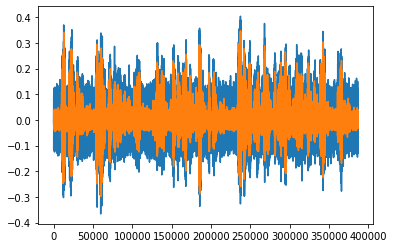

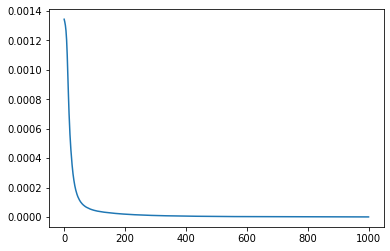

In [22]:
flattened = audio[:int(len(audio)-(len(audio)%1000))]
noise = np.random.normal(0, 0.04, (int(flattened.shape[0]),))
noisy_data = noise + flattened

# Reshape inputs and outputs for training
X_shaped = np.reshape(noisy_data, (int(flattened.shape[0]/1000), 1, 1000))
Y_shaped = np.reshape(flattened, (int(flattened.shape[0]/1000), 1, 1000))

predict = model.predict(model.predict(X_shaped))
shaped_out = np.reshape(predict, (len(flattened)))
display(ipd.Audio(noisy_data, rate=samplerate))
display(ipd.Audio(shaped_out, rate=samplerate))
plt.plot(noisy_data)
plt.plot(shaped_out)
plt.show()
# plt.plot(history.history['accuracy'])
# plt.show()
plt.plot(history.history['loss'])

In [ ]:
history2 = model.fit(X_shaped, Y_shaped, epochs=300, batch_size=32, verbose=2)

Epoch 1/300
7/7 - 2s - loss: 4.3121e-05 - accuracy: 0.2545 - 2s/epoch - 230ms/step
Epoch 2/300
7/7 - 2s - loss: 4.2555e-05 - accuracy: 0.2545 - 2s/epoch - 224ms/step
Epoch 3/300
7/7 - 2s - loss: 4.1998e-05 - accuracy: 0.2545 - 2s/epoch - 226ms/step
Epoch 4/300
7/7 - 2s - loss: 4.1622e-05 - accuracy: 0.2636 - 2s/epoch - 224ms/step
Epoch 5/300
7/7 - 2s - loss: 4.1238e-05 - accuracy: 0.2682 - 2s/epoch - 227ms/step
Epoch 6/300
7/7 - 2s - loss: 4.0911e-05 - accuracy: 0.2773 - 2s/epoch - 230ms/step
Epoch 7/300
7/7 - 2s - loss: 4.0601e-05 - accuracy: 0.2818 - 2s/epoch - 236ms/step
Epoch 8/300
7/7 - 2s - loss: 4.0295e-05 - accuracy: 0.2727 - 2s/epoch - 228ms/step
Epoch 9/300
7/7 - 2s - loss: 4.0011e-05 - accuracy: 0.2591 - 2s/epoch - 226ms/step
Epoch 10/300
7/7 - 2s - loss: 3.9754e-05 - accuracy: 0.2773 - 2s/epoch - 225ms/step
Epoch 11/300
7/7 - 2s - loss: 3.9497e-05 - accuracy: 0.2773 - 2s/epoch - 227ms/step
Epoch 12/300
7/7 - 2s - loss: 3.9275e-05 - accuracy: 0.2773 - 2s/epoch - 226ms/step
E